In [ ]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [ ]:
img_height,img_width = (224,224)
batch_size = 32
train_data_dir = r"C:\\Users\\Admin\\machine learning\\machine learnig\\stage_ete_02\\test_matriaux\\test_resnet\\output_\\train"
valid_data_dir = r"C:\\Users\\Admin\\machine learning\\machine learnig\\stage_ete_02\\test_matriaux\\test_resnet\\output_\\val"
test_data_dir = r"C:\\Users\\Admin\\machine learning\\machine learnig\\stage_ete_02\\test_matriaux\\test_resnet\\output_\\test"

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
    
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

valid_generator=train_datagen.flow_from_directory(
    valid_data_dir,#same directory as training data
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')#set as validation data

In [6]:
test_generator=train_datagen.flow_from_directory(
    test_data_dir,#same directory as training data
    target_size=(img_height,img_width),
    batch_size=1,
    class_mode='categorical',
    subset='validation')#set as validation data

Found 323 images belonging to 5 classes.


In [7]:
x,y = test_generator.next()
x.shape

(1, 224, 224, 3)

In [8]:
base_model = ResNet50(include_top=False,weights='imagenet',input_shape=(img_height,img_width,3))

for layer in base_model.layers:
    layer.trainable=False
    
    
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
x = Dense(512,activation='relu')(x)
x = Dense(256,activation='relu')(x)
x = Dense(64,activation='relu')(x)
                     
predictions = Dense(train_generator.num_classes,activation='softmax')(x)
model = Model(inputs=base_model.input ,outputs=predictions)



In [9]:
    
model.compile(optimizer='adam',loss='categorical_crossentropy' ,metrics=['accuracy'])
model.fit(train_generator,
                         epochs = 50)

Epoch 1/50
46/46 [==============================] - 200s 4s/step - loss: 0.6505 - accuracy: 0.7955
Epoch 2/50
46/46 [==============================] - 222s 5s/step - loss: 0.5116 - accuracy: 0.8373
Epoch 3/50
46/46 [==============================] - 219s 5s/step - loss: 0.4837 - accuracy: 0.8442
Epoch 4/50
46/46 [==============================] - 230s 5s/step - loss: 0.4834 - accuracy: 0.8456
Epoch 5/50
46/46 [==============================] - 223s 5s/step - loss: 0.4448 - accuracy: 0.8456
Epoch 6/50
46/46 [==============================] - 241s 5s/step - loss: 0.4408 - accuracy: 0.8511
Epoch 7/50
46/46 [==============================] - 230s 5s/step - loss: 0.4276 - accuracy: 0.8524
Epoch 8/50
46/46 [==============================] - 211s 5s/step - loss: 0.4030 - accuracy: 0.8600
Epoch 9/50
46/46 [==============================] - 188s 4s/step - loss: 0.3873 - accuracy: 0.8662
Epoch 10/50
46/46 [==============================] - 188s 4s/step - loss: 0.3704 - accuracy: 0.8648
Epoch 11/

In [10]:
model.save('C:\\Users\\Admin\\machine learning\\machine learnig\\stage_ete_02\\test_matriaux\\save_test_resnet\\ResNet50_materiaux_verre.h5' )

In [11]:
test_loss,test_acc = model.evaluate(test_generator, verbose=2)
print('\ntest accuracy:' , test_acc)

323/323 - 58s - loss: 0.7981 - accuracy: 0.8390 - 58s/epoch - 181ms/step

test accuracy: 0.8390092849731445


1/1 [==============================] - 0s 169ms/step


1/1 [==============================] - 0s 159ms/step


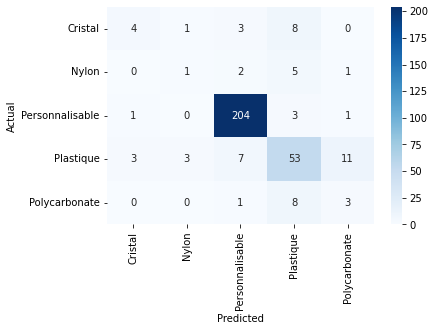

test accuracy:82.04334365325077


In [12]:
model = tf.keras.models.load_model('C:\\Users\\Admin\\machine learning\\machine learnig\\stage_ete_02\\test_matriaux\\save_test_resnet\\ResNet50_materiaux_verre.h5')
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
    X_test,Y_test = test_generator.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()]for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'],rownames=['Actual'],colnames=['Predicted'])

sns.heatmap(confusion_matrix,cmap='Blues',annot=True,fmt='d')
plt.show()
print('test accuracy:{}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [ ]:
#84

In [ ]:
#################################################################

In [7]:
base_model2 = tf.keras.applications.ResNet50V2(include_top=False,weights='imagenet',input_shape=(img_height,img_width,3))

x = base_model2.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
x = Dense(512,activation='relu')(x)
x = Dense(256,activation='relu')(x)
x = Dense(64,activation='relu')(x)

for layer in base_model2.layers:
    layer.trainable=False
                     
predictions = Dense(train_generator.num_classes,activation='softmax')(x)
model2 = Model(inputs=base_model2.input ,outputs=predictions)



In [8]:
    
model2.compile(optimizer='adam',loss='categorical_crossentropy' ,metrics=['accuracy'])
model2.fit(train_generator,
                         epochs = 35)

Epoch 1/35
46/46 [==============================] - 158s 3s/step - loss: 25.7101 - accuracy: 0.6156
Epoch 2/35
46/46 [==============================] - 161s 4s/step - loss: 2.9808 - accuracy: 0.7069
Epoch 3/35
46/46 [==============================] - 164s 4s/step - loss: 1.7734 - accuracy: 0.7543
Epoch 4/35
46/46 [==============================] - 169s 4s/step - loss: 0.9691 - accuracy: 0.7515
Epoch 5/35
46/46 [==============================] - 166s 4s/step - loss: 0.9332 - accuracy: 0.7694
Epoch 6/35
46/46 [==============================] - 168s 4s/step - loss: 0.7059 - accuracy: 0.7859
Epoch 7/35
46/46 [==============================] - 167s 4s/step - loss: 0.6717 - accuracy: 0.8016
Epoch 8/35
46/46 [==============================] - 167s 4s/step - loss: 0.6500 - accuracy: 0.8037
Epoch 9/35
46/46 [==============================] - 170s 4s/step - loss: 0.6456 - accuracy: 0.7968
Epoch 10/35
46/46 [==============================] - 168s 4s/step - loss: 0.6000 - accuracy: 0.8113
Epoch 11

In [9]:
test_loss,test_acc = model2.evaluate(test_generator, verbose=2)
print('\ntest accuracy:' , test_acc)

11/11 - 38s - loss: 0.4932 - accuracy: 0.8545 - 38s/epoch - 3s/step

test accuracy: 0.8544891476631165


In [10]:
model2.save('C:\\Users\\Admin\\OneDrive\\machine learning\\machine learnig\\stage_ete_02\\test_matriaux\\save_test\\Vgg16_p.h5' )

In [11]:
model2 = tf.keras.models.load_model('C:\\Users\\Admin\\OneDrive\\machine learning\\machine learnig\\stage_ete_02\\test_matriaux\\save_test\\Vgg16_p.h5')
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
    X_test,Y_test = test_generator.next()
    y_prob.append(model2.predict(X_test))
    y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()]for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'],rownames=['Actual'],colnames=['Predicted'])

sns.heatmap(confusion_matrix,cmap='Blues',annot=True,fmt='d')
plt.show()
print('test accuracy:{}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

1/1 [==============================] - 1s 1s/step


IndexError: list index out of range

In [ ]:
#82
##########################